In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from utils import load_dataset, compute_performance_metrics, print_metrics_summary

In [2]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train)

(382646, 243) (382646,)
(97300, 243) (97300,)
[[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]]


Em seguida, vamos testar algumas combinações de classificadores:

Tentamos algumas configurações utilizando apenas MLPs, e a configuração que melhor apresentou resultados foi a combinação com os 5 melhores MLPs encontrados anteriormente.

In [3]:
epochs = 10000
batch_size = 512
patience = 10
validation_fraction = 0.33

In [4]:
first_mlp = MLPClassifier(max_iter=epochs, batch_size=batch_size, early_stopping=True, n_iter_no_change=patience, validation_fraction=validation_fraction, activation='identity', random_state=42, hidden_layer_sizes=50)

In [5]:
second_mlp = MLPClassifier(max_iter=epochs, batch_size=batch_size, early_stopping=True, n_iter_no_change=patience, validation_fraction=validation_fraction, activation='tanh', random_state=42, hidden_layer_sizes=50)

In [6]:
third_mlp = MLPClassifier(max_iter=epochs, batch_size=batch_size, early_stopping=True, n_iter_no_change=patience, validation_fraction=validation_fraction, activation='logistic', random_state=42, hidden_layer_sizes=50)

In [7]:
fourth_mlp = MLPClassifier(max_iter=epochs, batch_size=batch_size, early_stopping=True, n_iter_no_change=patience, validation_fraction=validation_fraction, random_state=42)

In [8]:
fifth_mlp = MLPClassifier(max_iter=epochs, batch_size=batch_size, early_stopping=True, n_iter_no_change=patience, validation_fraction=validation_fraction, hidden_layer_sizes=200, random_state=42)

In [9]:
models = [('first_mlp', first_mlp), ('second_mlp', second_mlp), ('third_mlp', third_mlp), ('fourth_mlp', fourth_mlp), ('fifth_mlp', fifth_mlp)]
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('first_mlp',
                              MLPClassifier(activation='identity',
                                            batch_size=512, early_stopping=True,
                                            hidden_layer_sizes=50,
                                            max_iter=10000, random_state=42,
                                            validation_fraction=0.33)),
                             ('second_mlp',
                              MLPClassifier(activation='tanh', batch_size=512,
                                            early_stopping=True,
                                            hidden_layer_sizes=50,
                                            max_iter=10000, random_state=42,
                                            validation_fraction=0.3...
                                            hidden_layer_sizes=50,
                                            max_iter=10000, random_state=42,
                                            va

In [10]:
y_pred = ensemble.predict(x_test)

In [11]:
y_pred_proba = ensemble.predict_proba(x_test)

Com a matriz de confusão, podemos verificar que essa primeira configuração tem um balanço bom entre as acurácias para as duas classes.

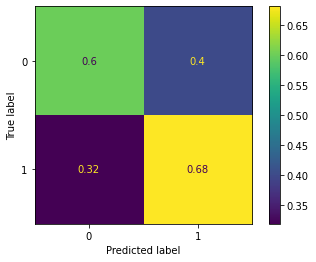

In [12]:
plot_confusion_matrix(ensemble, x_test, y_test, normalize='true')

Esse balanço se reflete no teste KS, onde se obteve um resultado relativamente bom para a separação das classes.

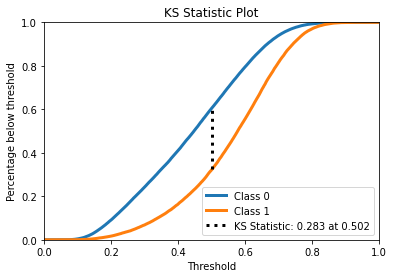


Accuracy:         0.6298
Recall:           0.6789
Precision:        0.4740
F1:               0.5583
AUROC:            0.6938
AUPR:             0.5253


In [33]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Em seguida, resolvemos utilizar classificadores mais variados. Dentre todas as configurações, o melhor conjunto de classificadores se deu pelo melhor MLP com o melhor Random Forest e o melhor Gradient Boosting.

In [4]:
best_mlp = MLPClassifier(max_iter=epochs, batch_size=batch_size, early_stopping=True, n_iter_no_change=patience, validation_fraction=validation_fraction, hidden_layer_sizes=50, random_state=42)

In [5]:
best_forest = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [6]:
best_gradient = GradientBoostingClassifier(n_iter_no_change=10, n_estimators=300, subsample=.7)

In [7]:
models = [('mlp', best_mlp), ('forest', best_forest), ('gradient', best_gradient)]
ensemble_best_classifiers = VotingClassifier(estimators=models, voting='soft')
ensemble_best_classifiers.fit(x_train, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(batch_size=512, early_stopping=True,
                                            hidden_layer_sizes=50,
                                            max_iter=10000, random_state=42,
                                            validation_fraction=0.33)),
                             ('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     max_features=0.4,
                                                     min_samples_leaf=200,
                                                     n_estimators=50)),
                             ('gradient',
                              GradientBoostingClassifier(n_estimators=300,
                                                         n_iter_no_change=10,
                                                         subsample=0.7))

In [8]:
y_pred_best_classifiers = ensemble_best_classifiers.predict(x_test)

In [9]:
y_pred_best_classifiers_proba = ensemble_best_classifiers.predict_proba(x_test)

Obvtivemos uma melhor acurácia para a classe "0", diminuindo os falsos positivos.

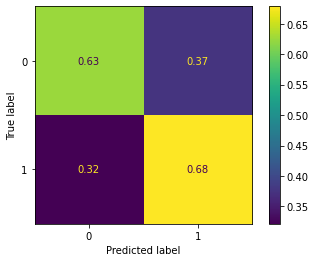

In [11]:
plot_confusion_matrix(ensemble_best_classifiers, x_test, y_test, normalize='true')

A separação entre as duas classes também teve uma pequena melhora, como mostra o teste KS.

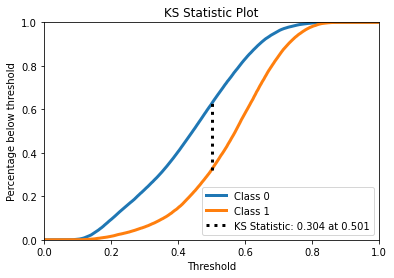


Accuracy:         0.6435
Recall:           0.6785
Precision:        0.4876
F1:               0.5674
AUROC:            0.7090
AUPR:             0.5479


In [12]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred_best_classifiers, y_pred_best_classifiers_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)